In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.read_csv("Chicago Weather Data 2011-2015.txt")

In [3]:
crime_df = pd.read_csv("Chicago Crime 2011-2015.csv")

In [4]:
weather_df.rename(columns={'CST':'Date'}, inplace=True)
weather_df['Date'] = pd.to_datetime(weather_df['Date']).dt.date

In [5]:
# This one takes a while...
crime_df['Date'] = pd.to_datetime(crime_df['Date']).dt.date

In [6]:
newcols = []
for i in weather_df.columns:
    if i[0] == ' ':
        i = i[1:]
    newcols.append(i)
weather_df.columns = newcols
weather_df['Clear'] = weather_df['CloudCover'].map(lambda x: int(x) < 3)

In [7]:
eventlist = list(weather_df['Events'].unique())
neweventlist = []
for i in eventlist:
    i = str(i)
    neweventlist.append(i.split('-'))
eventlist = []
for i in neweventlist:
    for j in i:
        if j != 'nan':
            eventlist.append(j)
eventlist = list(set(eventlist))
print(eventlist)

['Thunderstorm', 'Hail', 'Rain', 'Fog', 'Snow']


In [8]:
for e in eventlist:
    weather_df[e] = weather_df['Events'].map(lambda x: e in str(x))

In [9]:
combined = pd.merge(crime_df, weather_df, how='left', on='Date')
combined.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,FBI Code,Max TemperatureF,...,PrecipitationIn,CloudCover,Events,WindDirDegrees,Clear,Thunderstorm,Hail,Rain,Fog,Snow
0,2015-12-31,025XX W 63RD ST,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",OTHER,False,False,8,11,28,...,T,6,Snow,261,False,False,False,False,False,True
1,2015-12-31,075XX S EMERALD AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,6,14,28,...,T,6,Snow,261,False,False,False,False,False,True
2,2015-12-31,015XX N KEDZIE AVE,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,False,14,06,28,...,T,6,Snow,261,False,False,False,False,False,True
3,2015-12-31,079XX S STONY ISLAND AVE,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,4,04B,28,...,T,6,Snow,261,False,False,False,False,False,True
4,2015-12-31,037XX N CLARK ST,BATTERY,SIMPLE,SIDEWALK,True,False,19,08B,28,...,T,6,Snow,261,False,False,False,False,False,True


In [13]:
days = len(weather_df)
daycounts = {
    'Thunderstorm': len(weather_df[weather_df['Thunderstorm']]),
    'Hail': len(weather_df[weather_df['Hail']]),
    'Snow': len(weather_df[weather_df['Snow']]),
    'Rain': len(weather_df[weather_df['Rain']]),
    'Fog': len(weather_df[weather_df['Fog']]),
    'Clear': len(weather_df[weather_df['Clear']])
    }
print(days)
print(daycounts)

1826
{'Clear': 293, 'Rain': 608, 'Hail': 3, 'Thunderstorm': 191, 'Fog': 93, 'Snow': 273}


In [21]:
freq_no_thunder = combined[combined['Thunderstorm'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Thunderstorm'])
freq_yes_thunder = combined[combined['Thunderstorm'] == True].groupby('Primary Type')['Date'].count()/daycounts['Thunderstorm']

freq_no_hail = combined[combined['Hail'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Hail'])
freq_yes_hail = combined[combined['Hail'] == True].groupby('Primary Type')['Date'].count()/daycounts['Hail']

freq_no_snow = combined[combined['Snow'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Snow'])
freq_yes_snow = combined[combined['Snow'] == True].groupby('Primary Type')['Date'].count()/daycounts['Snow']

freq_no_rain = combined[combined['Rain'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Rain'])
freq_yes_rain = combined[combined['Rain'] == True].groupby('Primary Type')['Date'].count()/daycounts['Rain']

freq_no_fog = combined[combined['Fog'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Fog'])
freq_yes_fog = combined[combined['Fog'] == True].groupby('Primary Type')['Date'].count()/daycounts['Fog']

freq_clear = combined[combined['Clear'] == True].groupby('Primary Type')['Date'].count()/(daycounts['Clear'])
freq_not_clear = combined[combined['Clear'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Clear'])

In [22]:
thunder_comparison = pd.concat([freq_no_thunder, freq_yes_thunder],axis=1)
thunder_comparison.columns=['no thunder','thunder']
thunder_comparison['thunder affect'] = (thunder_comparison['thunder'] / thunder_comparison['no thunder']) - 1

hail_comparison = pd.concat([freq_no_hail, freq_yes_hail],axis=1)
hail_comparison.columns=['no hail','hail']
hail_comparison['hail affect'] = (hail_comparison['hail'] / hail_comparison['no hail']) - 1

snow_comparison = pd.concat([freq_no_snow, freq_yes_snow],axis=1)
snow_comparison.columns=['no snow','snow']
snow_comparison['snow affect'] = (snow_comparison['snow'] / snow_comparison['no snow']) - 1

rain_comparison = pd.concat([freq_no_rain, freq_yes_rain],axis=1)
rain_comparison.columns=['no rain','rain']
rain_comparison['rain affect'] = (rain_comparison['rain'] / rain_comparison['no rain']) - 1

fog_comparison = pd.concat([freq_no_fog, freq_yes_fog],axis=1)
fog_comparison.columns=['no fog','fog']
fog_comparison['fog affect'] = (fog_comparison['fog'] / fog_comparison['no fog']) - 1

clear_comparison = pd.concat([freq_clear, freq_not_clear],axis=1)
clear_comparison.columns=['clear','not clear']
clear_comparison['clear affect'] = (clear_comparison['clear'] / clear_comparison['not clear']) - 1

In [30]:
comparison_df = pd.concat([thunder_comparison['thunder affect'], hail_comparison['hail affect'], 
                          snow_comparison['snow affect'], rain_comparison['rain affect'],
                          fog_comparison['fog affect'], clear_comparison['clear affect']], axis = 1)

In [33]:
primary_types = list(combined['Primary Type'].unique())
type_counts = {}
for i in primary_types:
    type_counts[i] = len(combined[combined['Primary Type'] == i])

In [72]:
comparison_df['sample size'] = comparison_df.index.map(lambda x: type_counts[x])
comparison_df.sort_values(by='sample size', ascending=[1], inplace=True)

In [73]:
comparison_df.index.names = ['Primary Type']

In [74]:
comparison_df_truncated = comparison_df[comparison_df['sample size'] > 1000]

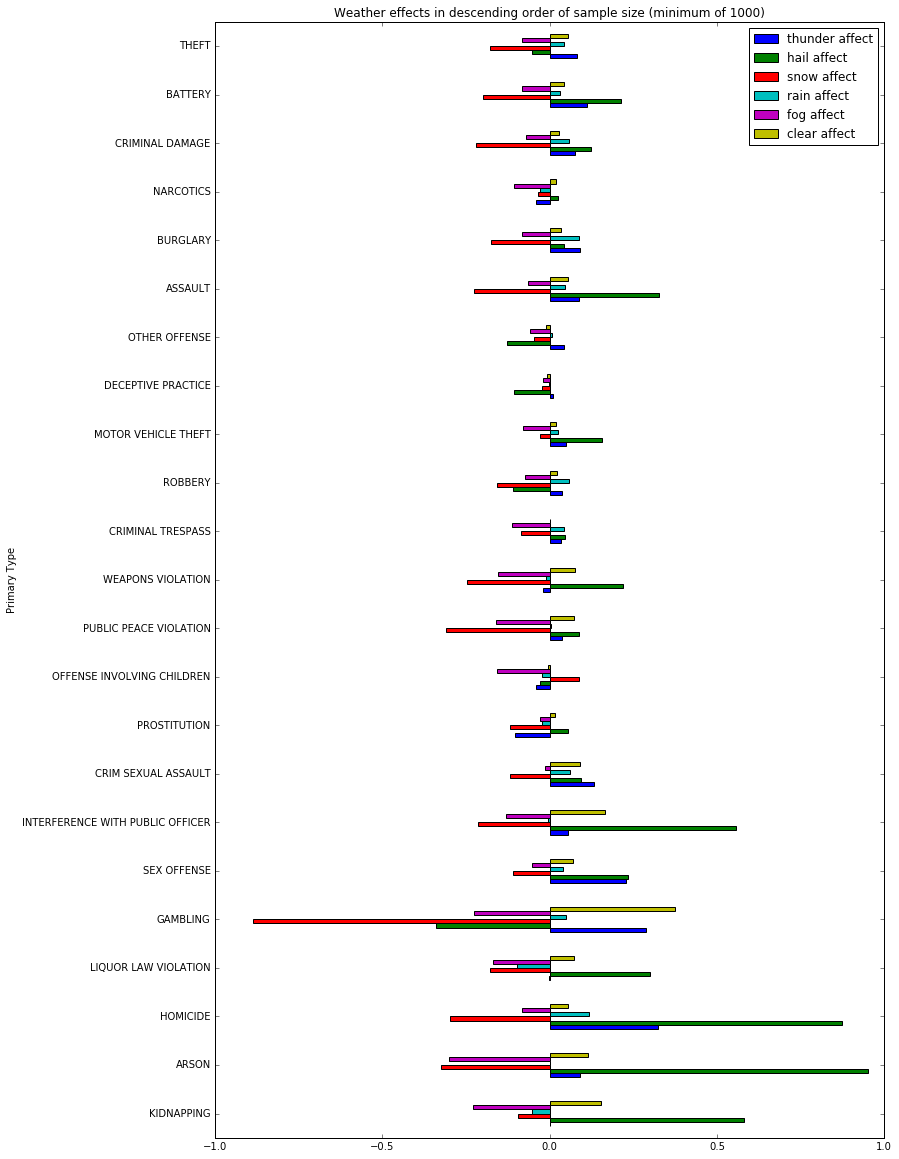

In [75]:
columns = [column for column in comparison_df_truncated.columns if column != 'sample size']
comparison_df_truncated[columns].plot(kind='barh', figsize=(12,20), 
                                      title='Weather effects in descending order of sample size (minimum of 1000)')